<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Cryptographie_Le_chiffre_de_Vigenere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction à la cryptographie**

Dans ce chapitre, nous allons introduire la notion de **cryptograhie** et découvrir quelques algorithme de **chiffrement faible**

Le chiffrement est un procédé de cryptographie qui consiste à rendre un document illisible à toute personne ne possédant pas la **clé** de déchiffrement.

Ici, nous allons découvrir le fonctionnement du **chiffre de Vigenère** qui est un système de **chiffrement par substitution polyalphanumérique**, **résistant à l'analyse de fréquences**.

Ici, l'idée est de définir un clé qui peut être un mot, une phrase, ou un paragraphe, et de décaler chaque lettre du texte à coder avec les lettres de la clé.

Prenons un exemple, avec la clé 'super' et le texte 'J'aime Python' à chiffrer. La clé est répétée autant de fois que nécessaire :

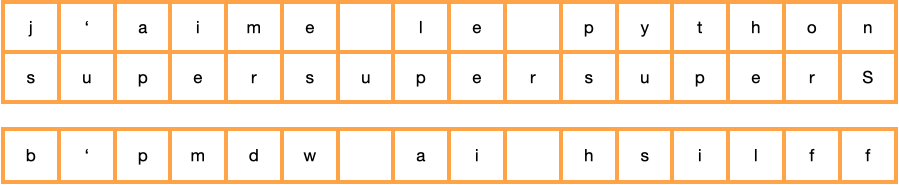

Ainsi, le texte 'j'aime le python' devient 'b'pmdw ai hsilff', et il n'est plus possible de détecter que des mots se terminent par la même lettre ('e' qui est converti en 'w' puis en 'i', et des lettres identiques qui se suivent ne donnent aucun indice ('ff' en fin du mot traduit, alors que les lettres d'origine sont différente : 'on').


In [2]:
from string import ascii_lowercase, ascii_uppercase
print(ascii_lowercase)
print(ascii_uppercase)

abcdefghijklmnopqrstuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ


En cas d'erreur sur ce bloc d'instructions, lancez l'installation du module string, redémarrez le noyau, puis re-exécutez la dernière cellule de code.

In [ ]:
import sys  
!{sys.executable} -m pip install --user string

Si nous cherchons à traduire le mot 'python' avec la clé 'super', commençons par chercher ce que donne la somme des lettres 'p' et 's'.
Nous devons trouver le numéro des deux lettres, les additionner, et retrouver la lettre obtenue :

In [35]:
lower = ascii_lowercase
upper = ascii_uppercase
iMot = lower.index('j')
print("indice de la lettre 'j' : ",iMot)
iCle = lower.index('s')
print("indice de la lettre 's' : ",iCle)
iCode = iMot + iCle
print("indice de la somme des lettres 'j' et 's' : ",iCode)
iCode2 = iCode % 26
print("indice de la somme des lettres 'j' et 's' sans erreur : ",iCode2)
lettre = lower[iCode2]
print("lettre chiffrée : ",lettre)

indice de la lettre 'j' :  9
indice de la lettre 's' :  18
indice de la somme des lettres 'j' et 's' :  27
indice de la somme des lettres 'j' et 's' sans erreur :  1
lettre chiffrée :  b


Voici maintenant la fonction de Vigenère reprenant ces principes :

In [39]:
def vigenere(x,cle):
  """
  Retourne x chiffré avec le chiffre de Vigenère et le texte cle
  """
  code=""
  for i in range(len(x)):
    if x[i] in lower:
      code += lower[(lower.index(x[i])+lower.index(cle[i%len(cle)]))%26]
    elif x[i] in upper:
      code += upper[(upper.index(x[i])+lower.index(cle[i%len(cle)]))%26]
    else:
      code+=x[i]
  return code

Chiffrons le texte 'j'aime le python' avec la clé 'super' :

In [40]:
code = vigenere("j'aime le python",'super')
print(code)

b'pmdw ai hsilff


Pour décoder, on réalise une soustraction :

In [38]:
def decode_vigenere(x,cle):
  """
  Retourne x chiffré avec le chiffre de Vigenère et le texte cle
  """
  code=""
  for i in range(len(x)):
    if x[i] in lower:
      code += lower[(lower.index(x[i])-lower.index(cle[i%len(cle)]))%26]
    elif x[i] in upper:
      code += upper[(upper.index(x[i])-lower.index(cle[i%len(cle)]))%26]
    else:
      code+=x[i]
  return code

In [44]:
decode = decode_vigenere(code,'super')
print(decode)

j'aime le python
